<a href="https://colab.research.google.com/github/RishitMahapatra/IEEE_Burnout_datathon_2025/blob/main/IEEE_burnout_datathon_RevOps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#TO SEE THE FINAL OUTPUT SUBMISSION SCROLL TO THE BOTTOM

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

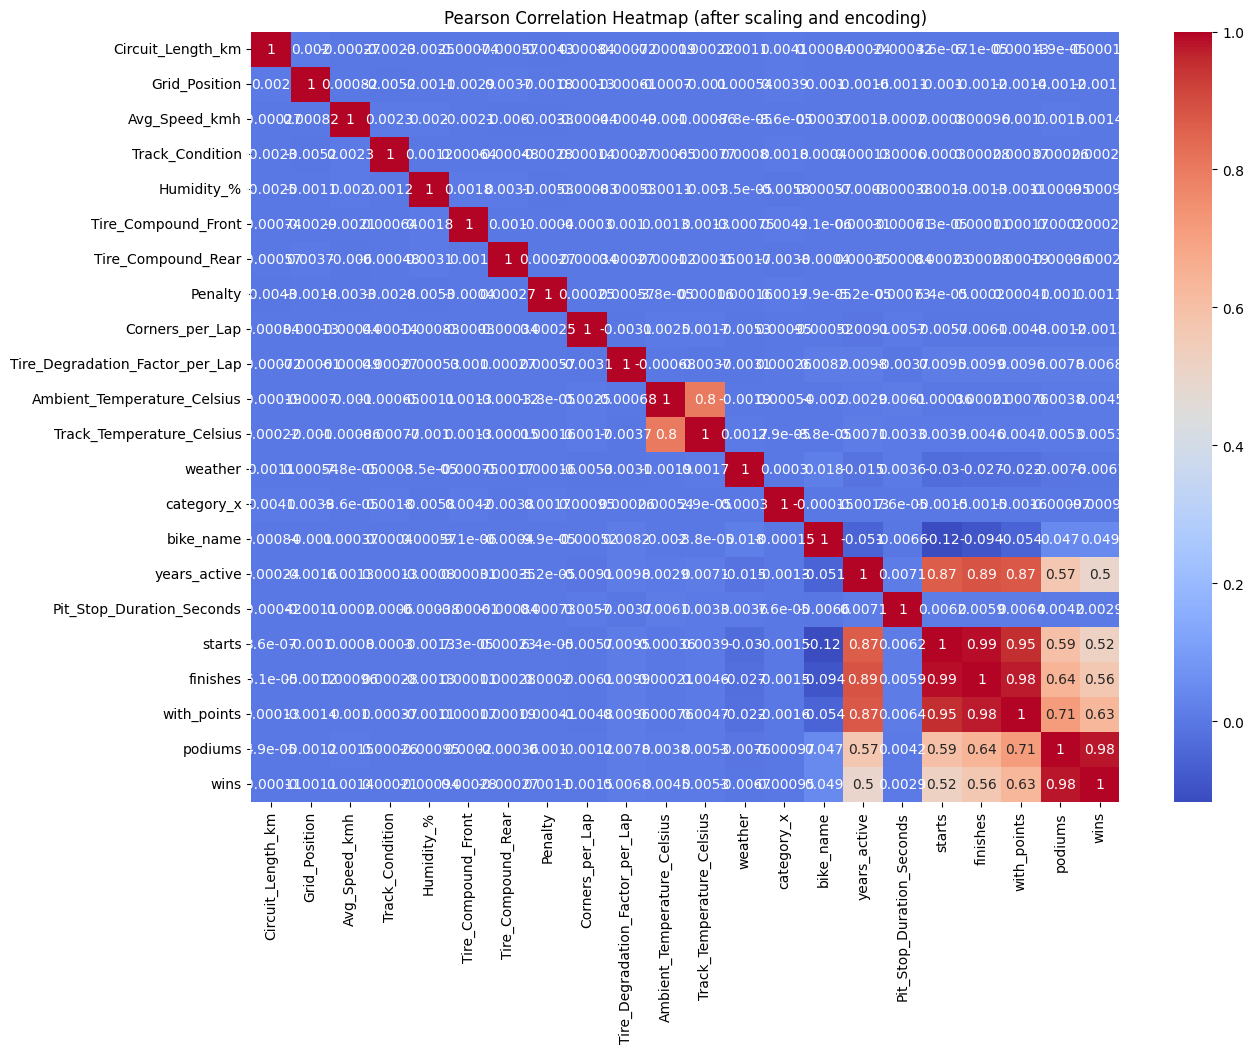

In [7]:

#CHEKING EACH IMPORTANCE OF THE FEATURES
df_train = pd.read_csv("/train.csv")
df_test = pd.read_csv("/test.csv")
df_val = pd.read_csv("/val.csv")

selected_features = [
    'Circuit_Length_km', 'Grid_Position', 'Avg_Speed_kmh',
    'Track_Condition', 'Humidity_%', 'Tire_Compound_Front', 'Tire_Compound_Rear',
    'Penalty', 'Corners_per_Lap', 'Tire_Degradation_Factor_per_Lap',
    'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius',
    'weather', 'category_x', 'bike_name', 'years_active',
    'Pit_Stop_Duration_Seconds', 'starts', 'finishes', 'with_points', 'podiums', 'wins'
]
#categorical features to be encoded
encode_cols = ['Track_Condition', 'Tire_Compound_Front', 'Tire_Compound_Rear',
               'weather', 'category_x', 'bike_name', 'Penalty']


numerical_cols = [col for col in selected_features if col not in encode_cols]
df_train_processed = df_train[selected_features].copy()

le_dict = {}
for col in encode_cols:
    if col in df_train_processed.columns:
        le = LabelEncoder()
        df_train_processed[col] = le.fit_transform(df_train_processed[col].astype(str))
        le_dict[col] = le
scaler = StandardScaler()

df_train_processed[numerical_cols] = scaler.fit_transform(df_train_processed[numerical_cols])


#using pearson correlation method
p_corr = df_train_processed.corr(method="pearson")
p_corr = pd.DataFrame(p_corr)
#plotting the heatmap for further inspection
plt.figure (figsize=(14,10))
sns.heatmap ( p_corr, annot = True, cmap = "coolwarm")
plt.title("Pearson Correlation Heatmap (after scaling and encoding)")
plt.show()

Top correlated features with Lap_Time_Seconds:

Corners_per_Lap                    0.008514
with_points                       -0.008157
years_active                      -0.007236
finishes                          -0.006135
bike_name                          0.005052
starts                            -0.004771
Track_Temperature_Celsius         -0.004662
podiums                           -0.004194
Ambient_Temperature_Celsius       -0.004110
wins                              -0.003585
weather                            0.002215
Pit_Stop_Duration_Seconds         -0.001746
Tire_Compound_Rear                 0.001276
Penalty                            0.000874
Circuit_Length_km                 -0.000837
Grid_Position                      0.000746
Tire_Degradation_Factor_per_Lap    0.000676
Avg_Speed_kmh                     -0.000506
category_x                        -0.000436
Tire_Compound_Front               -0.000431
Track_Condition                   -0.000188
Humidity_%                  

<ipython-input-9-3981683191>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")


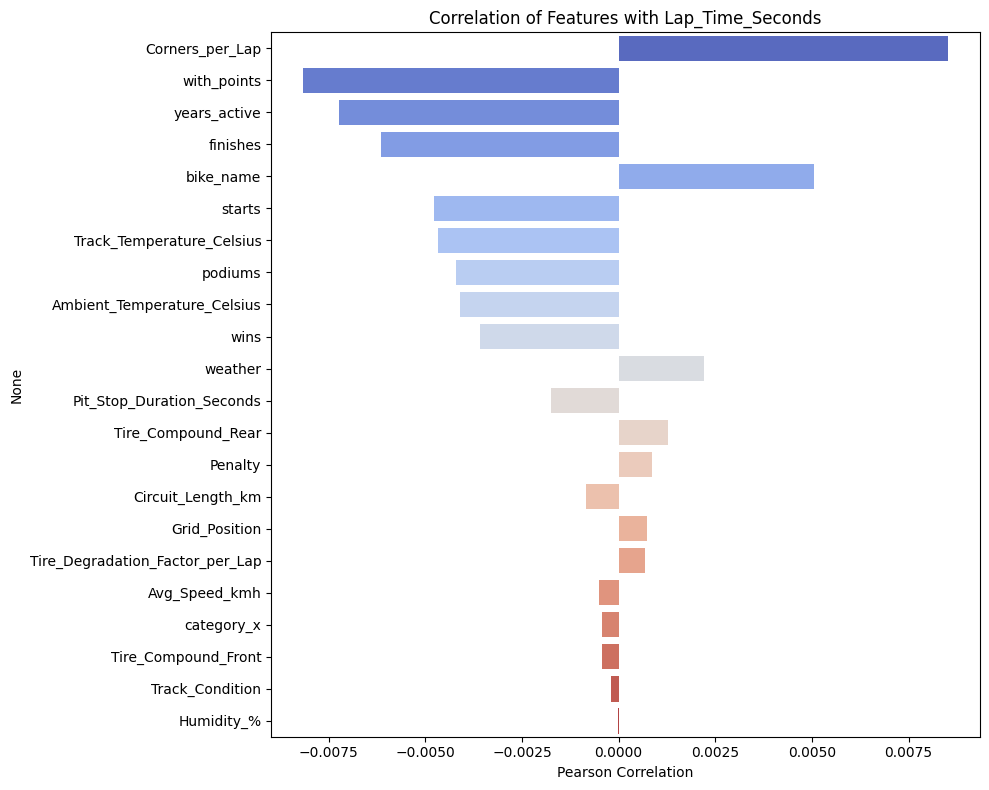

In [9]:

df_train_processed["Lap_Time_Seconds"] = df_train["Lap_Time_Seconds"]

p_corr = df_train_processed.corr(method="pearson")
target_corr = p_corr["Lap_Time_Seconds"].drop("Lap_Time_Seconds").sort_values(key=abs, ascending=False)
print("Top correlated features with Lap_Time_Seconds:\n")
print(target_corr)

plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")
plt.title("Correlation of Features with Lap_Time_Seconds")
plt.xlabel("Pearson Correlation")
plt.tight_layout()
plt.show()


0:	learn: 11.5300898	test: 11.5134891	best: 11.5134891 (0)	total: 348ms	remaining: 5m 47s
100:	learn: 11.4368067	test: 11.4226433	best: 11.4226433 (100)	total: 37.1s	remaining: 5m 30s
200:	learn: 11.3589184	test: 11.3469126	best: 11.3469126 (200)	total: 1m 14s	remaining: 4m 55s
300:	learn: 11.2873772	test: 11.2771370	best: 11.2771370 (300)	total: 1m 49s	remaining: 4m 13s
400:	learn: 11.2165692	test: 11.2077166	best: 11.2077166 (400)	total: 2m 25s	remaining: 3m 37s
500:	learn: 11.1508557	test: 11.1438585	best: 11.1438585 (500)	total: 3m 1s	remaining: 3m 1s
600:	learn: 11.0872762	test: 11.0818623	best: 11.0818623 (600)	total: 3m 38s	remaining: 2m 25s
700:	learn: 11.0244328	test: 11.0205113	best: 11.0205113 (700)	total: 4m 15s	remaining: 1m 49s
800:	learn: 10.9624747	test: 10.9604387	best: 10.9604387 (800)	total: 4m 51s	remaining: 1m 12s
900:	learn: 10.9037395	test: 10.9034386	best: 10.9034386 (900)	total: 5m 30s	remaining: 36.3s
999:	learn: 10.8471327	test: 10.8486973	best: 10.8486973 (9

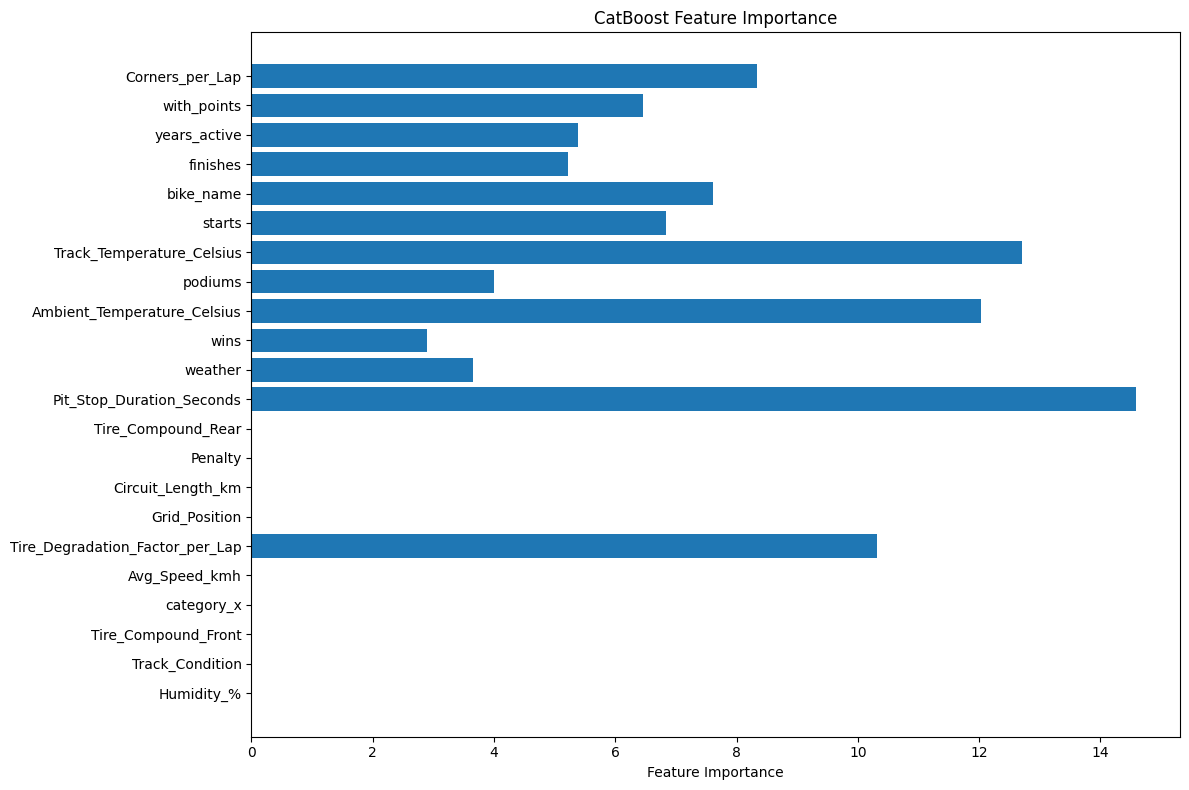

In [12]:

#THIS is the section for CatBoost model
from catboost import CatBoostRegressor, Pool

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load datasets each time for a new model
df_train = pd.read_csv("/train.csv")
df_val = pd.read_csv("/val.csv")
df_test = pd.read_csv("/test.csv")


selected_features = [
    'Corners_per_Lap', 'with_points', 'years_active', 'finishes', 'bike_name',
    'starts', 'Track_Temperature_Celsius', 'podiums', 'Ambient_Temperature_Celsius',
    'wins', 'weather', 'Pit_Stop_Duration_Seconds', 'Tire_Compound_Rear', 'Penalty',
    'Circuit_Length_km', 'Grid_Position', 'Tire_Degradation_Factor_per_Lap',
    'Avg_Speed_kmh', 'category_x', 'Tire_Compound_Front', 'Track_Condition', 'Humidity_%'
]
target = 'Lap_Time_Seconds'
encode_cols = ['Track_Condition', 'Tire_Compound_Front', 'Tire_Compound_Rear',
               'weather', 'category_x', 'bike_name', 'Penalty']


numerical_cols = [col for col in selected_features if col not in encode_cols]


combined = pd.concat([df_train, df_val, df_test], keys=["train", "val", "test"])




le_dict = {}
for col in encode_cols:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col].astype(str))
    le_dict[col] = le


scaler = StandardScaler()
combined[numerical_cols] = scaler.fit_transform(combined[numerical_cols])


df_train_enc = combined.loc["train"]
df_val_enc = combined.loc["val"]
df_test_enc = combined.loc["test"]



X_train = df_train_enc[selected_features]
y_train = df_train_enc[target]
X_val = df_val_enc[selected_features]

y_val = df_val_enc[target]
X_test = df_test_enc[selected_features]

train_pool = Pool(X_train, y_train)
val_pool = Pool(X_val, y_val)

model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='RMSE',
    early_stopping_rounds=50,
    verbose=100,
    random_state=42
)

model.fit(train_pool, eval_set=val_pool)



val_preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print(f"Validation RMSE: {rmse:.4f}")




test_preds = model.predict(X_test)
submission = pd.DataFrame({'Lap_Time_Seconds': test_preds})
submission.to_csv("catboost_predictions.csv", index=False)

importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
#THIS PART IS TO ANALYSE THE FEATURE IMPORATANCE ACCORDING TO MODEL
plt.figure(figsize=(12, 8))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("CatBoost Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [9]:
#THIS SECTION IS LIGHTGBM model implementation
import lightgbm as lgb


# Features and target
selected_features = [
    'Circuit_Length_km', 'Grid_Position', 'Avg_Speed_kmh',
    'Track_Condition', 'Humidity_%', 'Tire_Compound_Front', 'Tire_Compound_Rear',
    'Penalty', 'Corners_per_Lap', 'Tire_Degradation_Factor_per_Lap',
    'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius',
    'weather', 'category_x', 'bike_name', 'years_active',
    'Pit_Stop_Duration_Seconds', 'starts', 'finishes', 'with_points', 'podiums', 'wins'
]

target = 'Lap_Time_Seconds'
X_train = df_train_enc[selected_features]
y_train = df_train_enc[target]

X_val = df_val_enc[selected_features]
y_val = df_val_enc[target]

X_test = df_test_enc[selected_features]

# training lightGBM
lgb_model = lgb.LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=7,
    random_state=42
)

lgb_model.fit(X_train, y_train)

val_preds = lgb_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print(f"Validation RMSE: {rmse:.4f}")

#prediction testing
test_preds = lgb_model.predict(X_test)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.124250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2183
[LightGBM] [Info] Number of data points in the train set: 1914056, number of used features: 22
[LightGBM] [Info] Start training from score 90.002114
Validation RMSE: 11.0569


[0]	validation_0-rmse:11.51232
[100]	validation_0-rmse:11.34621
[200]	validation_0-rmse:11.19580
[300]	validation_0-rmse:11.05917
[400]	validation_0-rmse:10.92996
[500]	validation_0-rmse:10.80951
[600]	validation_0-rmse:10.69124
[700]	validation_0-rmse:10.57402
[800]	validation_0-rmse:10.46899
[900]	validation_0-rmse:10.36395
[999]	validation_0-rmse:10.26141

Validation RMSE: 10.2614


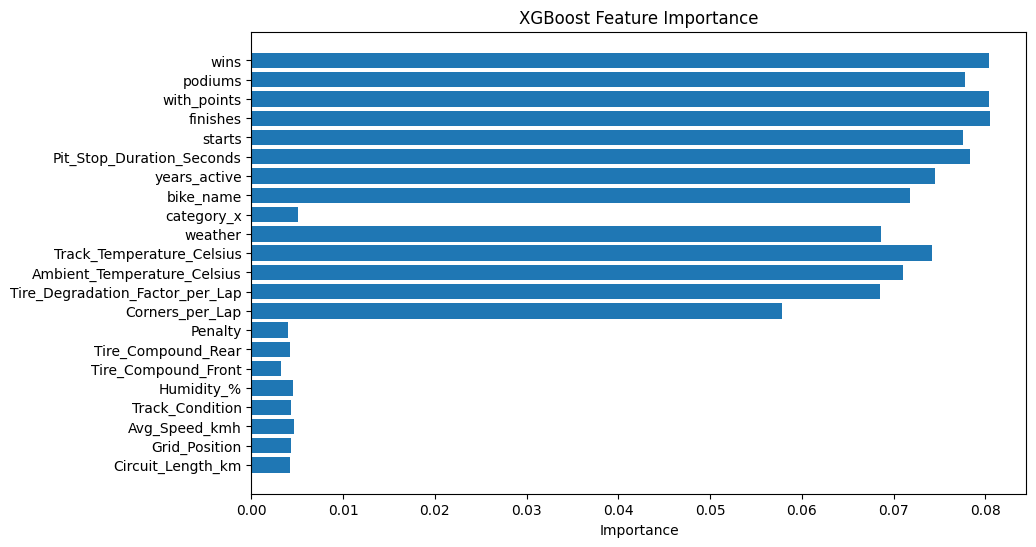

In [20]:

#This section is for XGBoost regressor with base_estimators = 1000
from sklearn.preprocessing import LabelEncoder, StandardScaler

from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Load data
df_train = pd.read_csv("/train.csv")
df_val = pd.read_csv("/val.csv")
df_test = pd.read_csv("/test.csv")

# Selected features
selected_features = [
    'Circuit_Length_km', 'Grid_Position', 'Avg_Speed_kmh',
    'Track_Condition', 'Humidity_%', 'Tire_Compound_Front', 'Tire_Compound_Rear',
    'Penalty', 'Corners_per_Lap', 'Tire_Degradation_Factor_per_Lap',
    'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius',
    'weather', 'category_x', 'bike_name', 'years_active',
    'Pit_Stop_Duration_Seconds', 'starts', 'finishes', 'with_points', 'podiums', 'wins'
]

target = 'Lap_Time_Seconds'

categorical_cols = ['Track_Condition', 'Tire_Compound_Front', 'Tire_Compound_Rear',
                    'weather', 'category_x', 'bike_name', 'Penalty']
numerical_cols = [col for col in selected_features if col not in categorical_cols]

combined = pd.concat([df_train, df_val, df_test], keys=["train", "val", "test"])

#label encoding process
for col in categorical_cols:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col].astype(str))


scaler = StandardScaler()
combined[numerical_cols] = scaler.fit_transform(combined[numerical_cols])

df_train_enc = combined.loc["train"]
df_val_enc = combined.loc["val"]
df_test_enc = combined.loc["test"]
X_train = df_train_enc[selected_features]
y_train = df_train_enc[target]
X_val = df_val_enc[selected_features]
y_val = df_val_enc[target]
X_test = df_test_enc[selected_features]

# Trainning the  model
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=100)
val_preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print(f"\nValidation RMSE: {rmse:.4f}")

test_preds = model.predict(X_test)


submission = pd.DataFrame({'Lap_Time_Seconds': test_preds})
submission.to_csv("xgb_predictions.csv", index=False)
plt.figure(figsize=(10, 6))
plt.barh(selected_features, model.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.show()


[0]	validation_0-rmse:11.51259
[100]	validation_0-rmse:11.34510
[200]	validation_0-rmse:11.19493
[300]	validation_0-rmse:11.04641
[400]	validation_0-rmse:10.91246
[500]	validation_0-rmse:10.78801
[600]	validation_0-rmse:10.66839
[700]	validation_0-rmse:10.55009
[800]	validation_0-rmse:10.43496
[900]	validation_0-rmse:10.32415
[1000]	validation_0-rmse:10.21557
[1100]	validation_0-rmse:10.11003
[1200]	validation_0-rmse:10.01078
[1300]	validation_0-rmse:9.90634
[1400]	validation_0-rmse:9.80327
[1500]	validation_0-rmse:9.70519
[1600]	validation_0-rmse:9.61543
[1700]	validation_0-rmse:9.52031
[1800]	validation_0-rmse:9.42914
[1900]	validation_0-rmse:9.33731
[2000]	validation_0-rmse:9.24592
[2100]	validation_0-rmse:9.15734
[2200]	validation_0-rmse:9.07338
[2300]	validation_0-rmse:8.99034
[2400]	validation_0-rmse:8.90490
[2499]	validation_0-rmse:8.82694

Validation RMSE: 8.8269


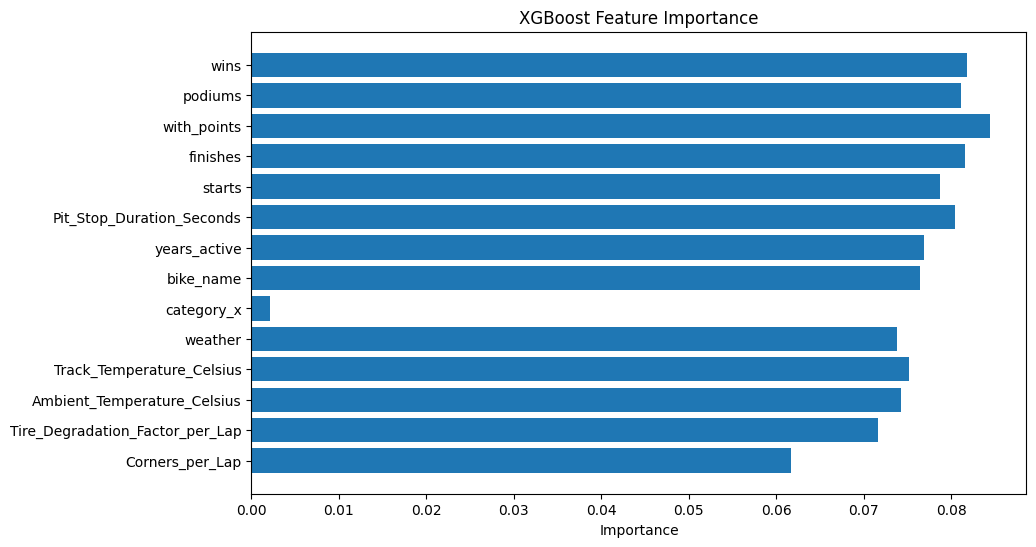

In [24]:
#This section is for XGBoost regressor with base_estimators = 2500
from xgboost import XGBRegressor



df_train = pd.read_csv("/train.csv")
df_val = pd.read_csv("/val.csv")
df_test = pd.read_csv("/test.csv")
selected_features = [ #removed the leat important features by seeing the previous graph of importance of features
    'Corners_per_Lap',
    'Tire_Degradation_Factor_per_Lap',
    'Ambient_Temperature_Celsius',
    'Track_Temperature_Celsius',
    'weather', 'category_x', 'bike_name',
    'years_active', 'Pit_Stop_Duration_Seconds',
    'starts', 'finishes', 'with_points', 'podiums', 'wins'
]

target = 'Lap_Time_Seconds'

categorical_cols = ['weather', 'category_x', 'bike_name']
numerical_cols = [col for col in selected_features if col not in categorical_cols]


combined = pd.concat([df_train, df_val, df_test], keys=["train", "val", "test"])
for col in categorical_cols:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col].astype(str))
scaler = StandardScaler()
combined[numerical_cols] = scaler.fit_transform(combined[numerical_cols])


df_train_enc = combined.loc["train"]
df_val_enc = combined.loc["val"]
df_test_enc = combined.loc["test"]
X_train = df_train_enc[selected_features]
y_train = df_train_enc[target]
X_val = df_val_enc[selected_features]
y_val = df_val_enc[target]
X_test = df_test_enc[selected_features]

model = XGBRegressor(
    n_estimators=2500,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train, eval_set=[(X_val, y_val)],
          verbose=100)
val_preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print(f"\nValidation RMSE: {rmse:.4f}")


test_preds = model.predict(X_test)
pd.DataFrame({'Lap_Time_Seconds': test_preds}).to_csv("xgb_predictions.csv", index=False)
plt.figure(figsize=(10, 6))
plt.barh(selected_features, model.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.show()


[0]	validation_0-rmse:11.51266
[100]	validation_0-rmse:11.34961
[200]	validation_0-rmse:11.19916
[300]	validation_0-rmse:11.05716
[400]	validation_0-rmse:10.92399
[500]	validation_0-rmse:10.79893
[600]	validation_0-rmse:10.68267
[700]	validation_0-rmse:10.56218
[800]	validation_0-rmse:10.44585
[900]	validation_0-rmse:10.33594
[1000]	validation_0-rmse:10.22786
[1100]	validation_0-rmse:10.12054
[1200]	validation_0-rmse:10.01552
[1300]	validation_0-rmse:9.91293
[1400]	validation_0-rmse:9.81328
[1500]	validation_0-rmse:9.71327
[1600]	validation_0-rmse:9.61839
[1700]	validation_0-rmse:9.52241
[1800]	validation_0-rmse:9.42983
[1900]	validation_0-rmse:9.33992
[2000]	validation_0-rmse:9.24979
[2100]	validation_0-rmse:9.16307
[2200]	validation_0-rmse:9.07957
[2300]	validation_0-rmse:8.99663
[2400]	validation_0-rmse:8.91106
[2500]	validation_0-rmse:8.82797
[2600]	validation_0-rmse:8.74372
[2700]	validation_0-rmse:8.66622
[2800]	validation_0-rmse:8.58831
[2900]	validation_0-rmse:8.51028
[2999]	va

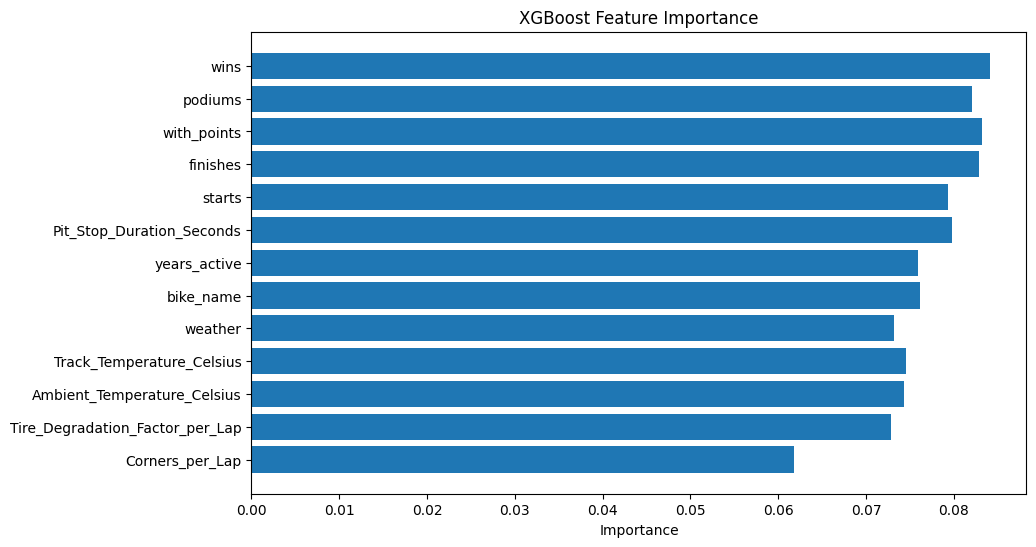

In [25]:
#This section is for XGBoost regressor with base_estimators = 3000


from xgboost import XGBRegressor



df_train = pd.read_csv("/train.csv")
df_val = pd.read_csv("/val.csv")
df_test = pd.read_csv("/test.csv")
selected_features = [
    'Corners_per_Lap',
    'Tire_Degradation_Factor_per_Lap',
    'Ambient_Temperature_Celsius',
    'Track_Temperature_Celsius',
    'weather', 'bike_name',
    'years_active', 'Pit_Stop_Duration_Seconds',
    'starts', 'finishes', 'with_points', 'podiums', 'wins'
]

target = 'Lap_Time_Seconds'

categorical_cols = ['weather', 'category_x', 'bike_name']
numerical_cols = [col for col in selected_features if col not in categorical_cols]


combined = pd.concat([df_train, df_val, df_test], keys=["train", "val", "test"])


for col in categorical_cols:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col].astype(str))
scaler = StandardScaler()
combined[numerical_cols] = scaler.fit_transform(combined[numerical_cols])

df_train_enc = combined.loc["train"]
df_val_enc = combined.loc["val"]
df_test_enc = combined.loc["test"]
X_train = df_train_enc[selected_features]
y_train = df_train_enc[target]
X_val = df_val_enc[selected_features]
y_val = df_val_enc[target]
X_test = df_test_enc[selected_features]


model = XGBRegressor(
    n_estimators=3000,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train, eval_set=[(X_val, y_val)],
          verbose=100)


val_preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print(f"\nValidation RMSE: {rmse:.4f}")

test_preds = model.predict(X_test)
pd.DataFrame({'Lap_Time_Seconds': test_preds}).to_csv("xgb_predictions.csv", index=False)

#ploting thefinal figure for feature imp
plt.figure(figsize=(10, 6))
plt.barh(selected_features, model.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.show()


In [27]:



test_df = pd.read_csv("/test.csv")


submission = pd.DataFrame({
    "Unique ID": test_df["Unique ID"],
    "Lap_Time_Seconds": test_preds
})

submission.to_csv("solution.csv", index=False)

print("soln created successfully.")


soln created successfully.


In [28]:

from catboost import CatBoostRegressor, Pool

import matplotlib.pyplot as plt


df_train = pd.read_csv("/train.csv")
df_val = pd.read_csv("/val.csv")
df_test = pd.read_csv("/test.csv")


selected_features = [
    'Corners_per_Lap', 'with_points', 'years_active', 'finishes', 'bike_name',
    'starts', 'Track_Temperature_Celsius', 'podiums', 'Ambient_Temperature_Celsius',
    'wins', 'weather', 'Pit_Stop_Duration_Seconds', 'Tire_Compound_Rear', 'Penalty',
    'Circuit_Length_km', 'Grid_Position', 'Tire_Degradation_Factor_per_Lap',
    'Avg_Speed_kmh', 'category_x', 'Tire_Compound_Front', 'Track_Condition', 'Humidity_%'
]
target = 'Lap_Time_Seconds'




encode_cols = ['Track_Condition', 'Tire_Compound_Front', 'Tire_Compound_Rear',
               'weather', 'category_x', 'bike_name', 'Penalty']
numerical_cols = [col for col in selected_features if col not in encode_cols]


combined = pd.concat([df_train, df_val, df_test], keys=["train", "val", "test"])


le_dict = {}
for col in encode_cols:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col].astype(str))
    le_dict[col] = le


scaler = StandardScaler()
combined[numerical_cols] = scaler.fit_transform(combined[numerical_cols])
df_train_enc = combined.loc["train"]
df_val_enc = combined.loc["val"]
df_test_enc = combined.loc["test"]

X_train = df_train_enc[selected_features]
y_train = df_train_enc[target]
X_val = df_val_enc[selected_features]
y_val = df_val_enc[target]
X_test = df_test_enc[selected_features]
test_ids = df_test['Unique ID']


train_pool = Pool(X_train, y_train)
val_pool = Pool(X_val, y_val)

model = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.03,
    depth=8,
    eval_metric='RMSE',
    early_stopping_rounds=100,
    verbose=100,
    random_state=42
)

model.fit(train_pool, eval_set=val_pool)

val_preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print(f"\nValidation RMSE: {rmse:.4f}")
test_preds = model.predict(X_test)




0:	learn: 11.5297673	test: 11.5131681	best: 11.5131681 (0)	total: 457ms	remaining: 15m 13s
100:	learn: 11.3932709	test: 11.3801233	best: 11.3801233 (100)	total: 47.4s	remaining: 14m 50s
200:	learn: 11.2702256	test: 11.2602091	best: 11.2602091 (200)	total: 1m 33s	remaining: 13m 57s
300:	learn: 11.1587065	test: 11.1520567	best: 11.1520567 (300)	total: 2m 19s	remaining: 13m 8s
400:	learn: 11.0525871	test: 11.0481975	best: 11.0481975 (400)	total: 3m 6s	remaining: 12m 25s
500:	learn: 10.9523070	test: 10.9497874	best: 10.9497874 (500)	total: 3m 52s	remaining: 11m 36s
600:	learn: 10.8542086	test: 10.8528514	best: 10.8528514 (600)	total: 4m 40s	remaining: 10m 52s
700:	learn: 10.7581121	test: 10.7587028	best: 10.7587028 (700)	total: 5m 26s	remaining: 10m 5s
800:	learn: 10.6679856	test: 10.6713372	best: 10.6713372 (800)	total: 6m 14s	remaining: 9m 20s
900:	learn: 10.5783772	test: 10.5832805	best: 10.5832805 (900)	total: 7m	remaining: 8m 32s
1000:	learn: 10.4943456	test: 10.5006023	best: 10.50060

[0]	validation_0-rmse:0.99839
[100]	validation_0-rmse:0.98425
[200]	validation_0-rmse:0.97120
[300]	validation_0-rmse:0.95889
[400]	validation_0-rmse:0.94734
[500]	validation_0-rmse:0.93650
[600]	validation_0-rmse:0.92641
[700]	validation_0-rmse:0.91596
[800]	validation_0-rmse:0.90588
[900]	validation_0-rmse:0.89634
[1000]	validation_0-rmse:0.88694
[1100]	validation_0-rmse:0.87765
[1200]	validation_0-rmse:0.86873
[1300]	validation_0-rmse:0.85985
[1400]	validation_0-rmse:0.85125
[1500]	validation_0-rmse:0.84304
[1600]	validation_0-rmse:0.83517
[1700]	validation_0-rmse:0.82704
[1800]	validation_0-rmse:0.81917
[1900]	validation_0-rmse:0.81130
[2000]	validation_0-rmse:0.80341
[2100]	validation_0-rmse:0.79585
[2200]	validation_0-rmse:0.78821
[2300]	validation_0-rmse:0.78104
[2400]	validation_0-rmse:0.77394
[2500]	validation_0-rmse:0.76705
[2600]	validation_0-rmse:0.75984
[2700]	validation_0-rmse:0.75287
[2800]	validation_0-rmse:0.74629
[2900]	validation_0-rmse:0.73939
[2999]	validation_0-rm

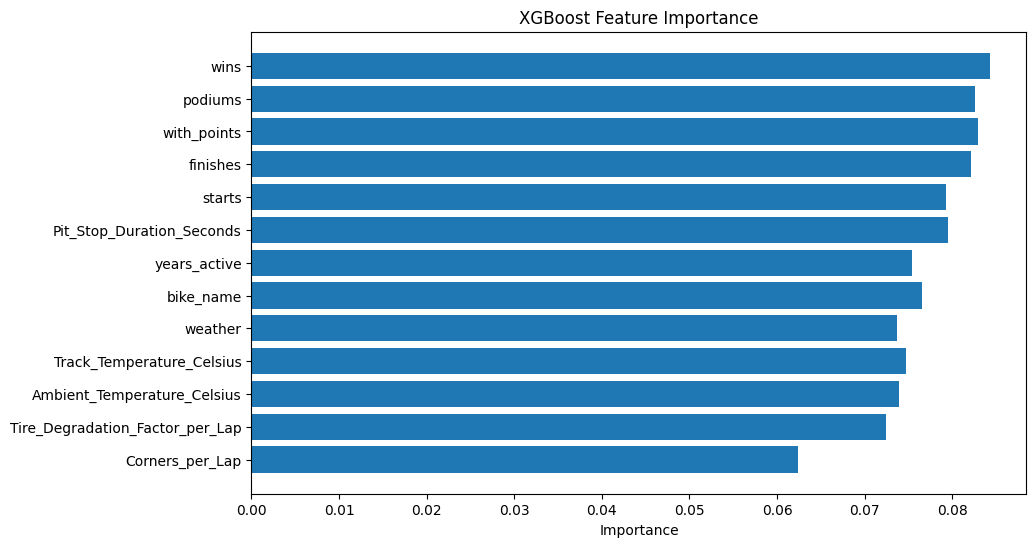

In [1]:

#THIS IS THE FIRST SUBMITION WE MADE
#cross checking with scalling the target variable

df_train = pd.read_csv("/train.csv")
df_val = pd.read_csv("/val.csv")
df_test = pd.read_csv("/test.csv")
selected_features = [
    'Corners_per_Lap',
    'Tire_Degradation_Factor_per_Lap',
    'Ambient_Temperature_Celsius',
    'Track_Temperature_Celsius',
    'weather', 'bike_name',
    'years_active', 'Pit_Stop_Duration_Seconds',
    'starts', 'finishes', 'with_points', 'podiums', 'wins'
]
target = 'Lap_Time_Seconds'


categorical_cols = ['weather', 'category_x', 'bike_name']


numerical_cols = [col for col in selected_features if col not in categorical_cols]
combined = pd.concat([df_train, df_val, df_test], keys=["train", "val", "test"])

for col in categorical_cols:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col].astype(str))


feature_scaler = StandardScaler()
combined[numerical_cols] = feature_scaler.fit_transform(combined[numerical_cols])

df_train_enc = combined.loc["train"]
df_val_enc = combined.loc["val"]
df_test_enc = combined.loc["test"]
X_train = df_train_enc[selected_features]
X_val = df_val_enc[selected_features]
X_test = df_test_enc[selected_features]
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(df_train_enc[[target]]).ravel()
y_val_scaled = target_scaler.transform(df_val_enc[[target]]).ravel()




model = XGBRegressor(
    n_estimators=3000,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train_scaled, eval_set=[(X_val, y_val_scaled)], verbose=100)

val_preds_scaled = model.predict(X_val)
val_preds = target_scaler.inverse_transform(val_preds_scaled.reshape(-1, 1)).ravel()
val_true = df_val_enc[target].values
rmse = np.sqrt(mean_squared_error(val_true, val_preds))
print(f"\nValidation RMSE (after inverse scaling): {rmse:.4f}")
test_preds_scaled = model.predict(X_test)
test_preds = target_scaler.inverse_transform(test_preds_scaled.reshape(-1, 1)).ravel()
pd.DataFrame({'Lap_Time_Seconds': test_preds}).to_csv("xgb_predictions.csv", index=False)

# plotting the feature imp
plt.figure(figsize=(10, 6))
plt.barh(selected_features, model.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.show()


In [3]:

test_preds_scaled = model.predict(X_test)
test_preds = target_scaler.inverse_transform(test_preds_scaled.reshape(-1, 1)).ravel()


test_df = pd.read_csv("/test.csv")

submission = pd.DataFrame({
    "Unique ID": test_df["Unique ID"],
    "Lap_Time_Seconds": test_preds
})

submission.to_csv("solution1.csv", index=False)

print("check creation of soln")


check creation of soln


In [4]:
from google.colab import files
files.download("solution1.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0]	validation_0-rmse:11.49857
[100]	validation_0-rmse:10.32571
[200]	validation_0-rmse:9.39480
[300]	validation_0-rmse:8.59732
[400]	validation_0-rmse:7.89288
[500]	validation_0-rmse:7.27724
[600]	validation_0-rmse:6.67094
[700]	validation_0-rmse:6.15664
[800]	validation_0-rmse:5.69454
[900]	validation_0-rmse:5.24310
[1000]	validation_0-rmse:4.82429
[1100]	validation_0-rmse:4.44707
[1200]	validation_0-rmse:4.06826
[1300]	validation_0-rmse:3.74697
[1400]	validation_0-rmse:3.44698
[1500]	validation_0-rmse:3.16936
[1600]	validation_0-rmse:2.91236
[1700]	validation_0-rmse:2.69212
[1800]	validation_0-rmse:2.47514
[1900]	validation_0-rmse:2.27713
[2000]	validation_0-rmse:2.10270
[2100]	validation_0-rmse:1.94369
[2200]	validation_0-rmse:1.79999
[2300]	validation_0-rmse:1.65867
[2400]	validation_0-rmse:1.52798
[2500]	validation_0-rmse:1.41167
[2600]	validation_0-rmse:1.30347
[2700]	validation_0-rmse:1.20764
[2800]	validation_0-rmse:1.12027
[2900]	validation_0-rmse:1.03510
[3000]	validation_0-

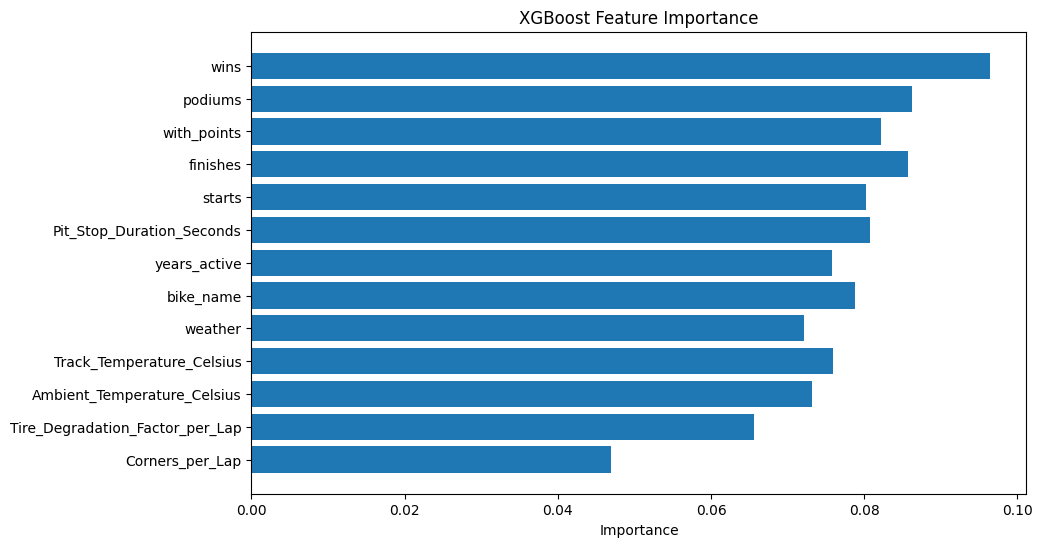

In [6]:
#This section is for XGBoost regressor with base_estimators = 3000
#learning rate and base estimators increased
#THIS IS THE SECOND SUBMISSION WE MADE

from xgboost import XGBRegressor



df_train = pd.read_csv("/train.csv")
df_val = pd.read_csv("/val.csv")
df_test = pd.read_csv("/test.csv")
selected_features = [
    'Corners_per_Lap',
    'Tire_Degradation_Factor_per_Lap',
    'Ambient_Temperature_Celsius',
    'Track_Temperature_Celsius',
    'weather', 'bike_name',
    'years_active', 'Pit_Stop_Duration_Seconds',
    'starts', 'finishes', 'with_points', 'podiums', 'wins'
]

target = 'Lap_Time_Seconds'

categorical_cols = ['weather', 'category_x', 'bike_name']
numerical_cols = [col for col in selected_features if col not in categorical_cols]


combined = pd.concat([df_train, df_val, df_test], keys=["train", "val", "test"])


for col in categorical_cols:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col].astype(str))
scaler = StandardScaler()
combined[numerical_cols] = scaler.fit_transform(combined[numerical_cols])

df_train_enc = combined.loc["train"]
df_val_enc = combined.loc["val"]
df_test_enc = combined.loc["test"]
X_train = df_train_enc[selected_features]
y_train = df_train_enc[target]
X_val = df_val_enc[selected_features]
y_val = df_val_enc[target]
X_test = df_test_enc[selected_features]


model = XGBRegressor(
    n_estimators=4500,
    learning_rate=0.085,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

model.fit(X_train, y_train, eval_set=[(X_val, y_val)],
          verbose=100)


val_preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print(f"\nValidation RMSE: {rmse:.4f}")

test_preds = model.predict(X_test)
pd.DataFrame({'Lap_Time_Seconds': test_preds}).to_csv("xgb_predictions.csv", index=False)

#ploting thefinal figure for feature imp
plt.figure(figsize=(10, 6))
plt.barh(selected_features, model.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.show()


In [7]:
from google.colab import files


submission = pd.DataFrame({
    "Unique ID": df_test["Unique ID"],
    "Lap_Time_Seconds": test_preds
})
submission.to_csv("solution2.csv", index=False)


files.download("solution2.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
#This section is for XGBoost regressor with base_estimators = 3000
#learning rate and base estimators increased
#THIS IS THE THIRD AND THE FINAL SUBMISSION WE MADE

from xgboost import XGBRegressor



df_train = pd.read_csv("/train.csv")
df_val = pd.read_csv("/val.csv")
df_test = pd.read_csv("/test.csv")
selected_features = [
    'Corners_per_Lap',
    'Tire_Degradation_Factor_per_Lap',
    'Ambient_Temperature_Celsius',
    'Track_Temperature_Celsius',
    'weather', 'bike_name',
    'years_active', 'Pit_Stop_Duration_Seconds',
    'starts', 'finishes', 'with_points', 'podiums', 'wins'
]

target = 'Lap_Time_Seconds'

categorical_cols = ['weather', 'category_x', 'bike_name']
numerical_cols = [col for col in selected_features if col not in categorical_cols]


combined = pd.concat([df_train, df_val, df_test], keys=["train", "val", "test"])


for col in categorical_cols:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col].astype(str))
scaler = StandardScaler()
combined[numerical_cols] = scaler.fit_transform(combined[numerical_cols])

df_train_enc = combined.loc["train"]
df_val_enc = combined.loc["val"]
df_test_enc = combined.loc["test"]
X_train = df_train_enc[selected_features]
y_train = df_train_enc[target]
X_val = df_val_enc[selected_features]
y_val = df_val_enc[target]
X_test = df_test_enc[selected_features]


model = XGBRegressor(
    n_estimators=5000,
    learning_rate=0.099,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

model.fit(X_train, y_train, eval_set=[(X_val, y_val)],
          verbose=100)


val_preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print(f"\nValidation RMSE: {rmse:.4f}")

test_preds = model.predict(X_test)
pd.DataFrame({'Lap_Time_Seconds': test_preds}).to_csv("xgb_predictions.csv", index=False)
from google.colab import files


submission = pd.DataFrame({
    "Unique ID": df_test["Unique ID"],
    "Lap_Time_Seconds": test_preds
})
submission.to_csv("solution3.csv", index=False)


files.download("solution3.csv")



[0]	validation_0-rmse:11.49607
[100]	validation_0-rmse:10.22283
[200]	validation_0-rmse:9.16403
[300]	validation_0-rmse:8.28324
[400]	validation_0-rmse:7.46829
[500]	validation_0-rmse:6.73526
[600]	validation_0-rmse:6.08396
[700]	validation_0-rmse:5.52530
[800]	validation_0-rmse:5.01063
[900]	validation_0-rmse:4.54038
[1000]	validation_0-rmse:4.12543
[1100]	validation_0-rmse:3.74554
[1200]	validation_0-rmse:3.40165
[1300]	validation_0-rmse:3.09255
[1400]	validation_0-rmse:2.82727
[1500]	validation_0-rmse:2.59646
[1600]	validation_0-rmse:2.35573
[1700]	validation_0-rmse:2.15945
[1800]	validation_0-rmse:1.96902
[1900]	validation_0-rmse:1.78772
[2000]	validation_0-rmse:1.63417
[2100]	validation_0-rmse:1.48884
[2200]	validation_0-rmse:1.35845
[2300]	validation_0-rmse:1.24635
[2400]	validation_0-rmse:1.13429
[2500]	validation_0-rmse:1.02955
[2600]	validation_0-rmse:0.94156
[2700]	validation_0-rmse:0.85795
[2800]	validation_0-rmse:0.78431
[2900]	validation_0-rmse:0.71706
[3000]	validation_0-

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>